In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
name = 'seasia_sero_dt5'
infile = '../frequencies/southeast_asia/serotype/seasia_sero_dt5_model_performance.csv'
model_performance = pd.read_csv(infile, index_col=0)

fit_params = ['DENV1_f0','DENV2_f0','DENV3_f0','beta', 'gamma', 'sigma']
metrics = ['abs_error', 'accuracy', 'beta', 'delta_sse', 'information_gain', 'pearson_r2', 'spearman_r']

/Users/Sidney/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Best fit (optimizing delta_sse):
DENV1_f0             4.571429
DENV2_f0             3.428571
DENV3_f0             2.142857
abs_error            0.132765
accuracy             0.803571
beta                 2.571429
delta_sse           15.018079
gamma                0.571429
information_gain    43.494464
pearson_r2           0.623182
sigma                0.857143
spearman_r           0.670682
Name: 185627, dtype: float64


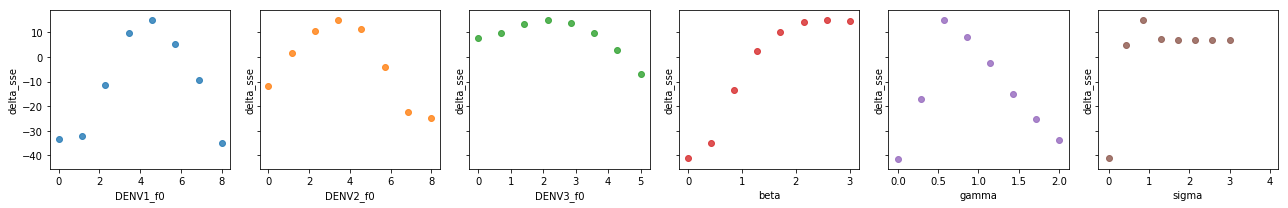

Best fit (optimizing pearson_r2):
DENV1_f0             3.428571
DENV2_f0             2.285714
DENV3_f0             0.714286
abs_error            0.132111
accuracy             0.803571
beta                 2.571429
delta_sse           14.746154
gamma                0.571429
information_gain    54.909883
pearson_r2           0.634448
sigma                0.857143
spearman_r           0.675337
Name: 185553, dtype: float64


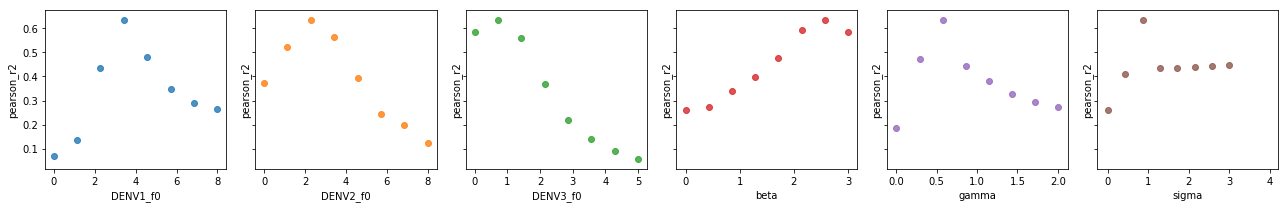

In [3]:
def plot_profile_likelihoods(model_performance, metric):

    if metric == 'abs_error':
        best_fit = model_performance.ix[model_performance[metric].idxmin()]
    else:
        best_fit = model_performance.ix[model_performance[metric].idxmax()]
    print 'Best fit (optimizing %s):\n'%metric, best_fit
    
    fig, axes = plt.subplots(ncols=len(fit_params), nrows=1, figsize=(3*len(fit_params), 3), sharey=True)
    for profile_param,ax in zip(fit_params, axes):
        
        fixed_params = [p for p in fit_params if p != profile_param]
        
        plot_data = model_performance
        for fp in fixed_params:
            plot_data = plot_data.loc[plot_data[fp] == best_fit[fp]]
        
        sns.regplot(profile_param, metric, data=plot_data, fit_reg=False, ax=ax)
        ax.set_xlabel(profile_param)
        ax.set_ylabel(metric)
        
    plt.tight_layout()
    plt.savefig('./png/%s_%s_perf.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return best_fit

    
delta_sse = plot_profile_likelihoods(model_performance, 'delta_sse')
r2 = plot_profile_likelihoods(model_performance, 'pearson_r2')

In [5]:
def generate_table(best_fit, metric, genres, antres):
    fit_dict = best_fit.to_dict()
    fit_dict['DENV4_f0'] = 0.0
    
    if metric == 'delta_sse':
        metric_str = '$\Delta$ SSE'
    elif metric == 'pearson_r2':
        metric_str = 'Pearson $R^2$'
    else:
        metric_str = metric.capitalize()
    metadata = ' & '.join([genres.capitalize(), antres.capitalize(), metric_str, '%.2f'%fit_dict[metric]])
    params = ' & '.join(['%.2f'%fit_dict[param] for param in ['beta', 'gamma', 'sigma', 'DENV1_f0', 'DENV2_f0', 'DENV3_f0', 'DENV4_f0']])
    print(metadata+' & '+params + r' \\ ')
    
generate_table(delta_sse, 'delta_sse', 'Serotype', 'Interserotype')
generate_table(r2, 'pearson_r2', 'Serotype', 'Interserotype')

Serotype & Interserotype & $\Delta$ SSE & 15.02 & 2.57 & 0.57 & 0.86 & 4.57 & 3.43 & 2.14 & 0.00 \\ 
Serotype & Interserotype & Pearson $R^2$ & 0.63 & 2.57 & 0.57 & 0.86 & 3.43 & 2.29 & 0.71 & 0.00 \\ 
